In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('max_columns', None)
info = pd.read_csv("../test/filedrivertest/to_csv/objects_info.csv")
info.describe()

,FrameIdx,TimeStamp,ObjIdx,BdBox_0X,BdBox_0Y,BdBox_1X,BdBox_1Y,BdBox_2X,BdBox_2Y,BdBox_3X,BdBox_3Y,Center_X,Center_Y,Velocity_X,Velocity_Y
count,32099.000000,3.209900e+04,32099.000000,32099.000000,32099.000000,32099.000000,32099.000000,32099.000000,32099.000000,32099.000000,32099.000000,32099.000000,32099.000000,32099.000000,32099.000000
mean,1289.350478,1.505369e+09,6.692109,24.698397,7.799220,24.718523,7.075033,23.442972,7.020751,23.422846,7.744938,24.070684,7.409985,14.481788,0.319984
std,1094.422441,4.377540e+01,6.222684,94.032731,12.141804,94.018310,12.540596,94.080164,12.295450,94.095006,11.886175,94.047077,12.199852,9.475125,2.532092
min,0.000000,1.505369e+09,0.000000,-226.381653,-104.527588,-226.389038,-104.525116,-225.897751,-102.605942,-225.890274,-102.608414,-226.125946,-103.566765,-21.537807,-17.047483
25%,444.000000,1.505369e+09,2.000000,-41.302984,1.949902,-41.272224,0.795311,-41.997265,0.701510,-41.979177,1.912519,-41.637035,1.357877,14.269928,-0.334293
50%,801.000000,1.505369e+09,5.000000,20.503063,6.437642,20.526062,5.430667,18.743078,5.403763,18.718220,6.413384,19.549009,5.948927,16.816362,0.090579
75%,2222.500000,1.505369e+09,11.000000,92.290607,11.486324,92.412102,10.534437,92.262398,10.494640,92.134602,11.458230,92.276974,10.932714,20.599632,0.591273
max,3918.000000,1.505369e+09,29.000000,298.466705,116.978195,298.466705,116.978195,298.466705,111.961395,298.466705,111.961395,298.466705,114.469795,31.002392,21.283175


In [3]:
info.head()

,FrameIdx,TimeStamp,ObjIdx,BdBox_0X,BdBox_0Y,BdBox_1X,BdBox_1Y,BdBox_2X,BdBox_2Y,BdBox_3X,BdBox_3Y,Center_X,Center_Y,Class_Name,Velocity_X,Velocity_Y
0,0,1.505369e+09,0,33.962875,0.505278,33.957809,-1.199798,29.423162,-1.186318,29.428232,0.518758,31.693020,-0.340520,Car,15.714168,-0.046714
1,0,1.505369e+09,1,144.656891,5.315582,144.669678,3.322351,138.081360,3.280111,138.068573,5.273342,141.369125,4.297847,Truck,17.124807,0.109794
2,0,1.505369e+09,2,48.755569,4.878856,48.773026,3.478460,42.835640,3.404447,42.818184,4.804842,45.795605,4.141651,Truck,16.601341,0.206948
3,0,1.505369e+09,3,27.311588,4.677684,27.279587,3.013759,22.978626,3.096478,23.010628,4.760404,25.145107,3.887081,Car,15.028389,-0.289039
4,0,1.505369e+09,4,-21.053070,0.527956,-21.063114,-1.111441,-22.188801,-1.104545,-22.178757,0.534852,-21.620935,-0.288295,Car,14.390348,-0.088234


# 每帧情况

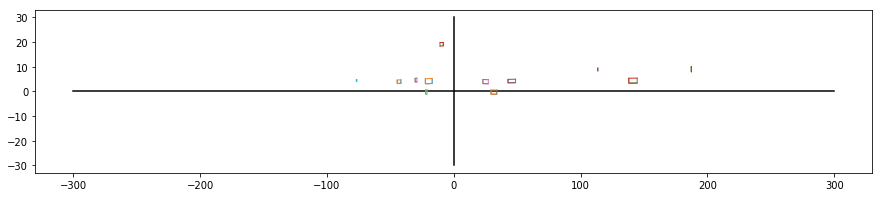

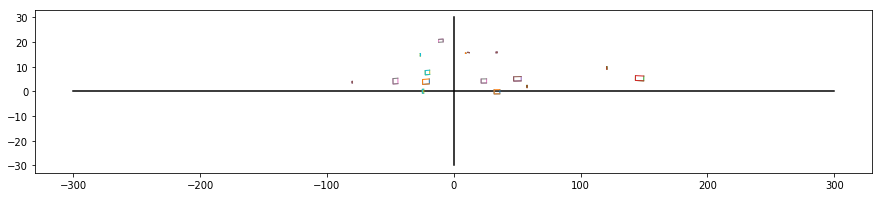

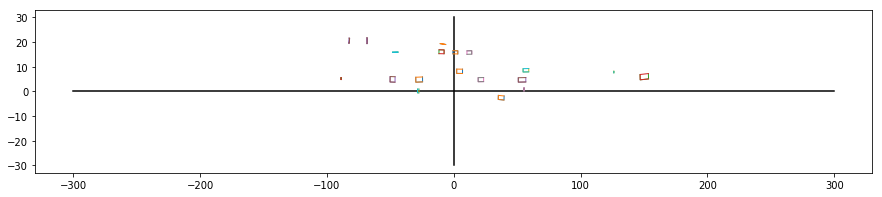

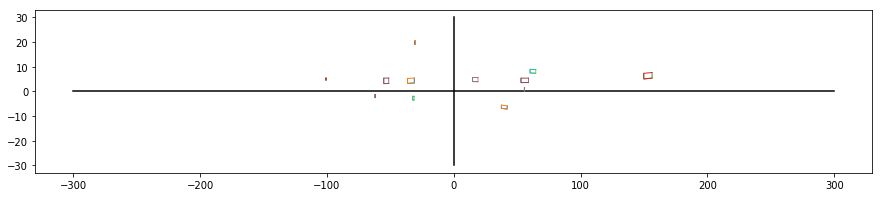

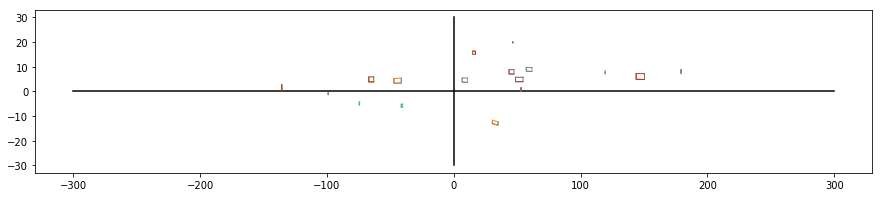

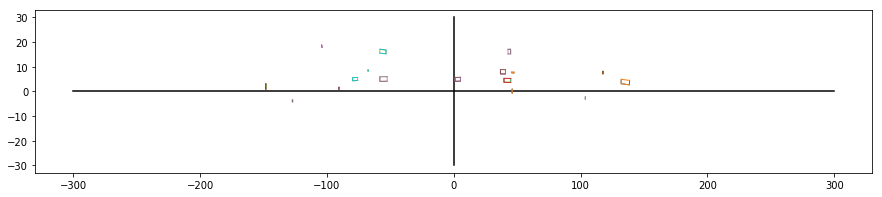

In [4]:
for i in range(0,501,100):
    frame1 = info[info.FrameIdx == i]
    plt.figure(figsize=(15,3))
    plt.plot([-300,300], [0,0],'black')
    plt.plot([0,0], [-30,30],'black')
    for object in frame1.iterrows():
        x0,y0,x1,y1,x2,y2,x3,y3 = object[1][3:11]
        plt.plot([[x0,x1],[x1,x2],[x2,x3],[x3,x0]],[[y0,y1],[y1,y2],[y2,y3],[y3,y0]],linewidth=1.0)

# Outer

In [5]:
def omiga(points):
    angles = []
    for i,j in [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]:
        a,b = points[i],points[j]
        #print(a,b)
        lin1 = np.sqrt(a[0]**2+a[1]**2)
        lin2 = np.sqrt(b[0]**2+b[1]**2)
        dui = np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
        #print(lin1,lin2,dui)
        tmp = (lin1**2+lin2**2-dui**2)/2/lin1/lin2
        #print(np.arccos(tmp)/np.pi*180)
        angles.append([[i,j],np.arccos(tmp)/np.pi*180])
    max_angle = angles[0][1]
    end_points = angles[0][0]
    for i,j in angles:
        #print('ij',i,j)
        if j>max_angle:
            max_angle = j
            end_points = i
        #print(points,max_angle)
    return(end_points,max_angle)

In [6]:
def plot_outer(points):
    outer_idx,max_angle = omiga(points)
    #print(outer_idx,max_angle)
    a,b = points[outer_idx[0]],points[outer_idx[1]]
    #print(a,b)
    middle = [(a[0]+b[0])/2,(a[1]+b[1])/2]
    #print(middle)
    plt.plot([-12,12], [0,0],'black')
    plt.plot([0,0], [-12,12],'black')
    x0,y0 = points[0]
    x1,y1 = points[1]
    x2,y2 = points[2]
    x3,y3 = points[3]
    plt.plot([[x0,x1],[x1,x2],[x2,x3],[x3,x0]],[[y0,y1],[y1,y2],[y2,y3],[y3,y0]],linewidth=1.0)
    #print(a,b,middle)
    plt.plot([0,a[0]],[0,a[1]])
    plt.plot([0,b[0]],[0,b[1]])
    plt.plot([0,middle[0]],[0,middle[1]])

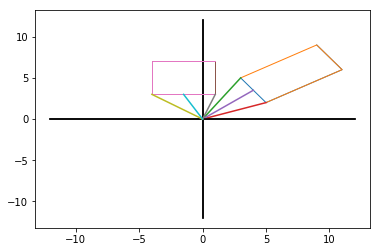

In [7]:
# Test
points = [[3,5],[5,2],[11,6],[9,9]]
plot_outer(points)
points = [[1,3],[1,7],[-4,7],[-4,3]]
plot_outer(points)

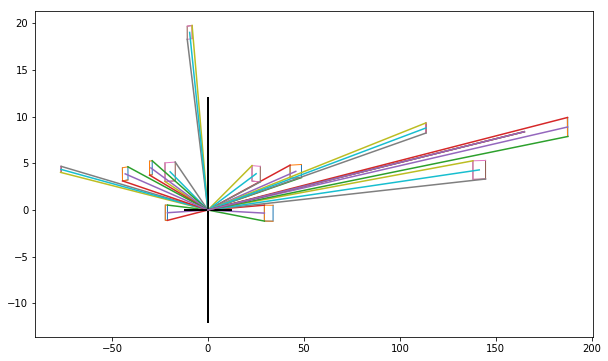

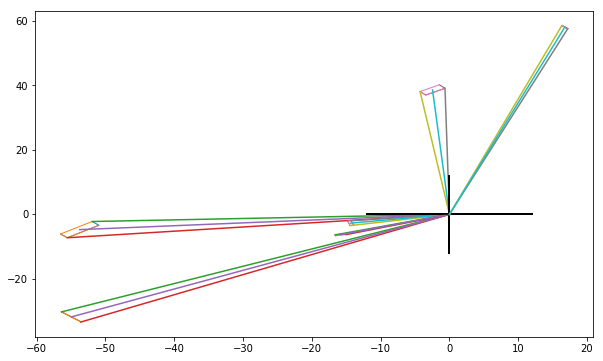

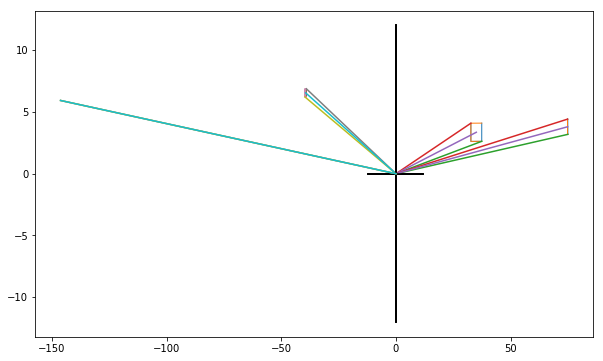

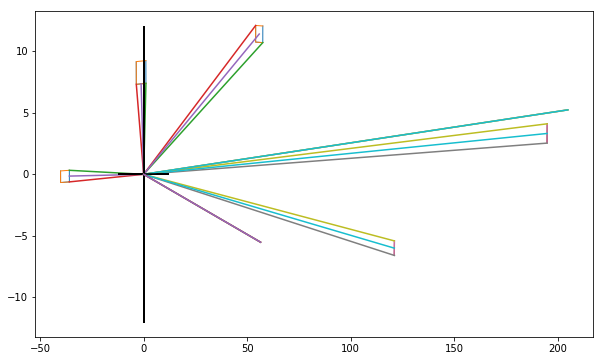

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [8]:
for i in range(0,10000,1000):
    frame1 = info[info.FrameIdx == i]
    plt.figure(figsize=(10,6))
    for object in frame1.iterrows():
        x0,y0,x1,y1,x2,y2,x3,y3 = object[1][3:11]
        points = [[x0,y0],[x1,y1],[x2,y2],[x3,y3]]
        #print(points)
        plot_outer(points)
    plt.show()

# Center

In [9]:
def plot_center(points,center):
    plt.plot([-12,12], [0,0],'black')
    plt.plot([0,0], [-12,12],'black')
    x0,y0 = points[0]
    x1,y1 = points[1]
    x2,y2 = points[2]
    x3,y3 = points[3]
    plt.plot([[x0,x1],[x1,x2],[x2,x3],[x3,x0]],[[y0,y1],[y1,y2],[y2,y3],[y3,y0]],linewidth=1.0)
    plt.plot([0,center[0]],[0,center[1]])

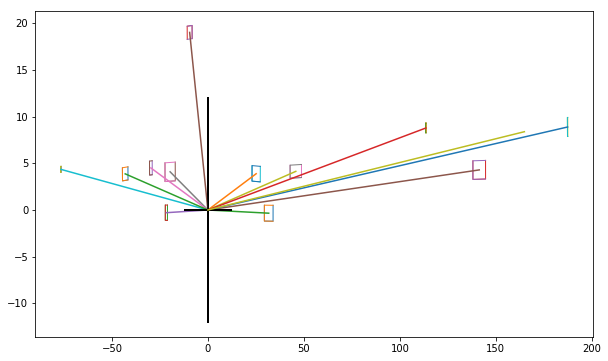

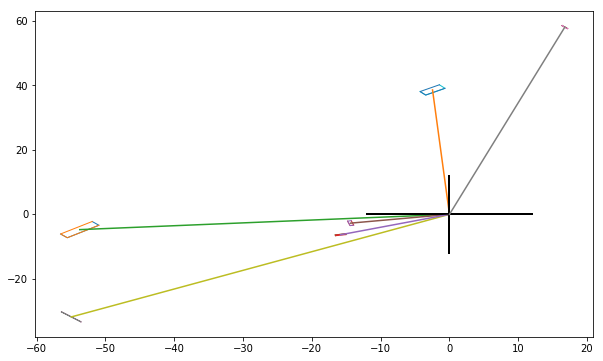

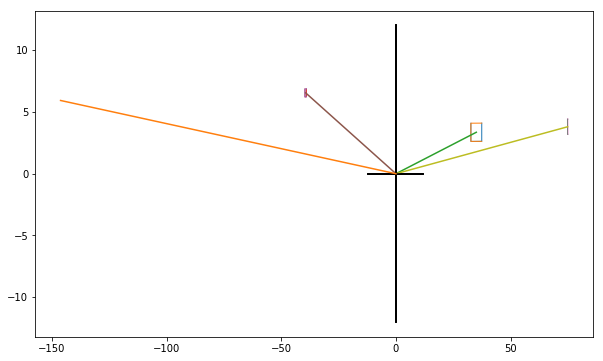

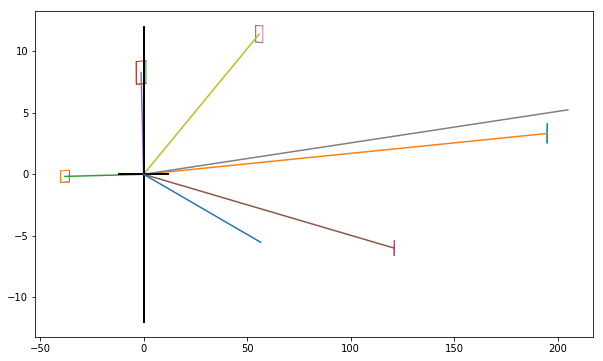

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [10]:
for i in range(0,5001,1000):
    frame1 = info[info.FrameIdx == i]
    plt.figure(figsize=(10,6))
    for obj in frame1.iterrows():
        x0,y0,x1,y1,x2,y2,x3,y3 = obj[1][3:11]
        points = [[x0,y0],[x1,y1],[x2,y2],[x3,y3]]
        center = [obj[1].Center_X,obj[1].Center_Y]
        #print(points,center)
        plot_center(points,center)
    plt.show()

In [11]:
time_start = info.iloc[0,1]
info.TimeStamp = info.TimeStamp - time_start

In [12]:
info = info[info['FrameIdx']!=3918]

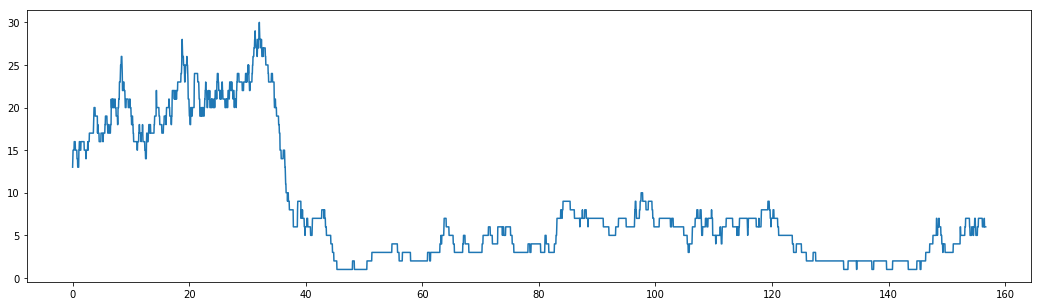

In [13]:
plt.figure(figsize=(18,5))
plt.plot(info[info['ObjIdx']==0].TimeStamp,info.groupby('FrameIdx').count().ObjIdx)

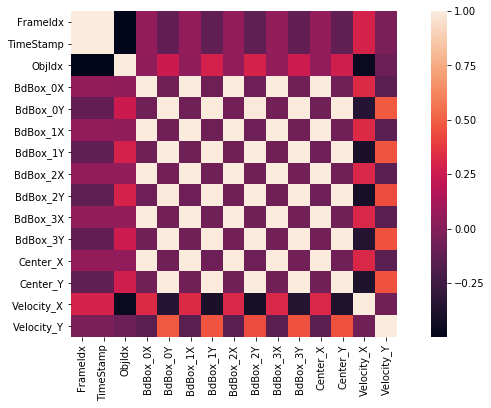

In [14]:
corrmat = info.corr()
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corrmat, square=True);